In [1]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import time
from datetime import timedelta

def date_2_timestamp(year,mon,day):
    tempString=str(year)+"-"+str(mon)+"-"+str(day)
    tempTime=time.strptime(tempString, "%Y-%m-%d")
    return time.mktime(tempTime)

def timestamp_2_date(un_time):
    return datetime.datetime.fromtimestamp(un_time)


def timestamp_removeDay_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return temp_timestamp

def timestamp_removeDay_add(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    if temp_date.month==12:
        return date_2_timestamp(temp_date.year+1,1,1)
    else:
        return date_2_timestamp(temp_date.year,temp_date.month+1,1)
    
def date_removeDay_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return timestamp_2_date(temp_timestamp)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# 返回从最小到最大之间经过的时间戳，间隔为一个月
def max_min_2_timestampList(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        temp_date=date_removeDay_reduce(single_date)
        temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)

def timestamp_2_string(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    if temp_date.month<10:
        tempMonth="0"+str(temp_date.month)
    else:
        tempMonth=str(temp_date.month)
    return str(temp_date.year)+"-"+tempMonth

list_value [33554.282218539454, 3238.599243329309, 0, 1126112.6183741805, 547352.8380330781, 936486.9973728948, 792844.2549478015]
height 1126112.6183741805
height 936486.9973728948
height 8642.376180305982
height 0.0


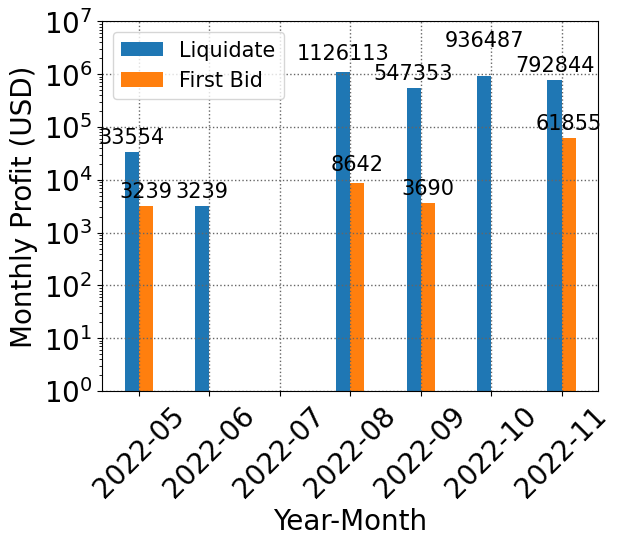

In [5]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    i=0
    for rect in rects:
        height = rect.get_height()
        # if height==0:
        #     continue
        
        if i==5:
            print("height",height)
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 18),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
            
        elif i==3:
            print("height",height)
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 6),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
        else: 
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
        
        i+=1
# ·····························································································
df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/liquidate/csv/liquidate_withRevenue.csv")
df=df[df["revenue_dollar"]>0]
df=df[df["blockNumber"]<=16000000]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

tx_map={}
for index,row in df.iterrows():
    transactionHash=row["transactionHash"]
    timestamp=row["timestamp"]
    totalReward=row["revenue_dollar"]
    timestamp=timestamp_removeDay_reduce(timestamp)
    tx_map[transactionHash]={"timestamp":timestamp,"totalReward":totalReward}
    
timestamp_map = {}
for key,value in tx_map.items():
    timestamp=value["timestamp"]
    totalReward=value["totalReward"]
    
    if timestamp not in timestamp_map:
        timestamp_map[timestamp]=0
    timestamp_map[timestamp]+=totalReward
    
list_key=[]
list_value=[]

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in timestamp_map:
        timestamp_map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( timestamp_map[tempTimestamp] )

print("list_value",list_value)

x = np.arange(len(list_key))
width = 0.2
rects0=plt.bar( x - 0.5* width ,  list_value, width, label="Liquidate")
autolabel(rects0)


# ·····························································································

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/liquidate/csv/firstBid_withRevenue.csv")
df=df[df["blockNumber"]<=16000000]
df=df[df["revenue_dollar"]>0]
# minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
# maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

tx_map={}
for index,row in df.iterrows():
    transactionHash=row["transactionHash"]
    timestamp=row["timestamp"]
    totalReward=row["revenue_dollar"]
    timestamp=timestamp_removeDay_reduce(timestamp)
    tx_map[transactionHash]={"timestamp":timestamp,"totalReward":totalReward}
    
timestamp_map = {}
for key,value in tx_map.items():
    timestamp=value["timestamp"]
    totalReward=value["totalReward"]
    
    if timestamp not in timestamp_map:
        timestamp_map[timestamp]=0
    timestamp_map[timestamp]+=totalReward
    
list_key=[]
list_value=[]

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in timestamp_map:
        timestamp_map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( timestamp_map[tempTimestamp] )
    
# print("list_key",list_key)
# print("list_value",list_value)


x = np.arange(len(list_key))
rects1=plt.bar( x + 0.5* width ,  list_value, width, label="First Bid")
autolabel(rects1)


plt.ylim(1,10000000)
plt.yscale('log')
plt.legend(loc=2, ncol=1, fontsize=15)
plt.xticks(x,labels=list_key,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('Monthly Profit (USD)', fontsize=20)
plt.xlabel('Year-Month', fontsize=20)

plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/liquidate/photo/liquidate_usd.pdf",bbox_inches='tight')

# position

list_key:  ['2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']
list_value:  [[93], [], [], [158], [338, 161, 196], [], [71, 54, 142, 275, 34, 33, 155, 84]]


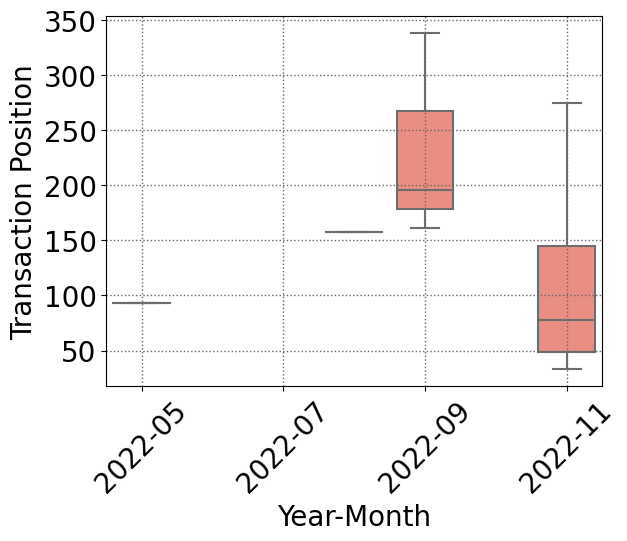

In [4]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/liquidate/csv/firstBid_withRevenue.csv")
df=df[df["blockNumber"]<=16000000]

tx_map={}

# for index,row in df.iterrows():
#     transactionHash=row["transactionHash"]
#     position=row["position"]
#     timestamp=row["timestamp"]
#     timestamp=timestamp_removeDay_reduce(timestamp)

#     tx_map[ transactionHash] = {"timestamp":int(timestamp), "position":position}
    
for index in range(0,len(df),3):
    transactionHash=df.iloc[index]["transactionHash"]
    position=df.iloc[index]["position"]
    timestamp=df.iloc[index]["timestamp"]
    timestamp=timestamp_removeDay_reduce(timestamp)

    tx_map[ transactionHash] = {"timestamp":int(timestamp), "position":position}
    

timestamp_map={}

for key,value in tx_map.items():
    timestamp=value["timestamp"]
    position=value["position"]
    try:
        timestamp_map[timestamp].append(position)
    except:
        timestamp_map[timestamp]=[position]
        

        
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in timestamp_map:
        timestamp_map[tempTimestamp]=[]
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( timestamp_map[tempTimestamp] )
    
print("list_key: ",list_key)
print("list_value: ",list_value)

# fig,axes=plt.subplots(1,1,figsize = (15, 3))
# ax=axes
sns.boxplot(data=list_value,color="salmon")

x = np.arange(len(list_key)) 
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Transaction Position', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")


tempX=[]
tempLabel=[]
for i in range(0,len(list_key),2):
    tempX.append(i)
    tempLabel.append(list_key[i])
plt.xticks(tempX,labels=tempLabel,fontsize=20,rotation=45)
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/liquidate/photo/firstBid_txpos.pdf",bbox_inches='tight')
